<a href="https://colab.research.google.com/github/daniel-saunders-phil/dowry-game/blob/main/Reproducible_data_analysis_similiarity_bias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['font.size'] = 14

# Version 1



## Sensitivity analysis for random pairing

In [138]:
url = "https://raw.githubusercontent.com/daniel-saunders-phil/dowry-game/main/data/Ethnicity%20bias%20in%20social%20learning%20-%20two%20pop%20immutable%20markers%20basic-parameters-2-table.csv"

data = pd.read_csv(url)
data

,[run number],mr_marker,random-pairing,game,mr_learning_style,ethnic_bias?,mr_strategy,[step],success?,collapse?
0,3,0,0.1,1,0,True,0,1350,True,False
1,1,0,0.1,1,0,True,0,1840,True,False
2,2,0,0.1,1,0,True,0,1953,True,False
3,4,0,0.1,1,0,True,0,2526,True,False
4,5,0,0.1,1,0,True,0,1645,True,False
...,...,...,...,...,...,...,...,...,...,...
3995,3996,0,1.0,4,0,True,0,15,False,True
3996,3997,0,1.0,4,0,True,0,11,False,True
3997,3998,0,1.0,4,0,True,0,15,False,True
3998,3999,0,1.0,4,0,True,0,17,False,True


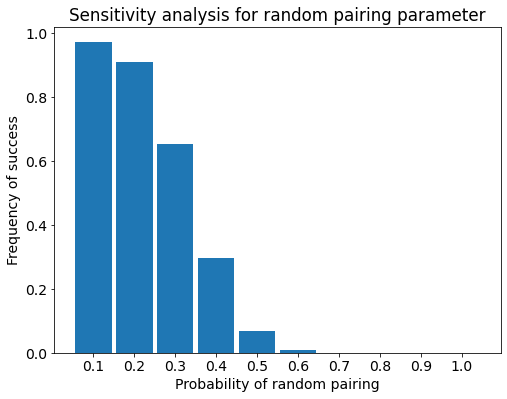

In [139]:
success = data["success?"]
pairing = data["random-pairing"]

params = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

success_by_pairing = [success[pairing == p] for p in params]
mean_success_by_pairing_param = [np.mean(l) for l in success_by_pairing]

plt.bar(params,mean_success_by_pairing_param,width=.09)
plt.xticks(params)
plt.ylabel('Frequency of success')
plt.xlabel('Probability of random pairing')
plt.title('Sensitivity analysis for random pairing parameter')
plt.show()

In [140]:
mean_success_by_pairing_param

[0.97, 0.9075, 0.6525, 0.2975, 0.0675, 0.0075, 0.0, 0.0, 0.0, 0.0]

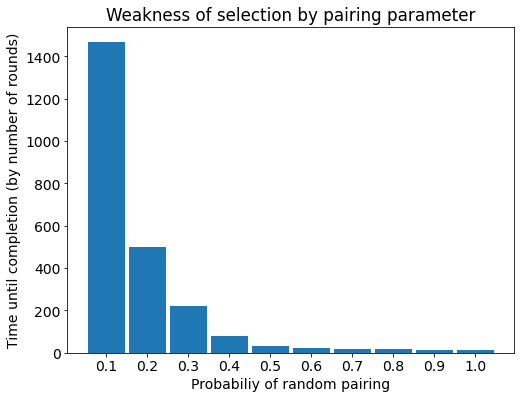

In [141]:
steps = data['[step]']

steps_by_pairing = [steps[pairing == p] for p in params]
mean_steps_by_pairing_param = [np.mean(l) for l in steps_by_pairing]

plt.bar(params,mean_steps_by_pairing_param,width=.09)
plt.xticks(params)
plt.title("Weakness of selection by pairing parameter")
plt.ylabel('Time until completion (by number of rounds)')
plt.xlabel('Probabiliy of random pairing')
plt.show()

# Initial frequency

In [142]:
url = "https://raw.githubusercontent.com/daniel-saunders-phil/dowry-game/main/data/Ethnicity%20bias%20in%20social%20learning%20-%20two%20pop%20immutable%20markers%20sensitivity%20to%20initial%20level%20of%20ethnic%20learning-table.csv"

data = pd.read_csv(url,sep=",",lineterminator='\n')
data

,[run number],mr_marker,random-pairing,game,initial_proportion_ethnic_learning,mr_learning_style,ethnic_bias?,mr_strategy,[step],success?,collapse?\r
0,3,0,0.1,1,0.1,0,True,0,17,False,true\r
1,4,0,0.1,1,0.1,0,True,0,21,False,true\r
2,1,0,0.1,1,0.1,0,True,0,20,False,true\r
3,2,0,0.1,1,0.1,0,True,0,24,False,true\r
4,6,0,0.1,1,0.1,0,True,0,14,False,true\r
...,...,...,...,...,...,...,...,...,...,...,...
2495,2498,0,0.5,1,0.5,0,True,0,18,False,true\r
2496,2495,0,0.5,1,0.5,0,True,0,30,False,true\r
2497,2497,0,0.5,1,0.5,0,True,0,18,False,true\r
2498,2499,0,0.5,1,0.5,0,True,0,21,False,true\r


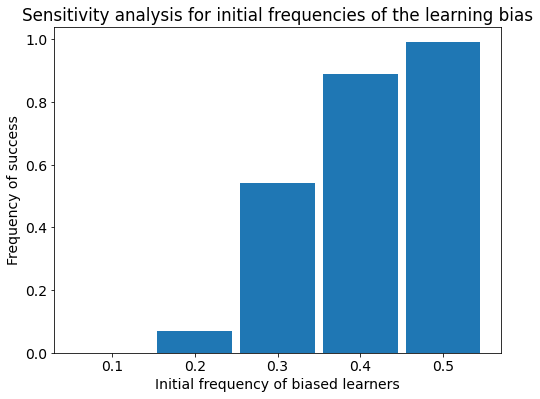

In [143]:
params = [0.1,0.2,0.3,0.4,0.5]
indexer = [0,1,2,3,4]

selectors = [data['random-pairing'] == p for p in params]

summary = []
for j in indexer:
    filtered_data = data[selectors[j]]
    selector_2 = [filtered_data['initial_proportion_ethnic_learning'] == p for p in params]

    frequency_of_success = []
    for i in indexer:
        filtered_data_2 = filtered_data[selector_2[i]]
        frequency_of_success.append(np.mean(filtered_data_2['success?']))

    summary.append(frequency_of_success)
    
plt.bar(params,summary[0],width=.09)
plt.xticks(params)
plt.xlabel('Initial frequency of biased learners')
plt.ylabel('Frequency of success')
plt.title("Sensitivity analysis for initial frequencies of the learning bias")
plt.show()

# Playing to learning ratio

In [144]:
url = "https://raw.githubusercontent.com/daniel-saunders-phil/dowry-game/main/data/Ethnicity%20bias%20in%20social%20learning%20-%20plays%20per%20learn%20sensitivity-table.csv"

data = pd.read_csv(url)
data

,[run number],random-pairing,initial_proportion_ethnic_learning,mr_learning_style,mr_strategy,plays_per_learn,[step],success?,collapse?
0,2,0.1,0.1,0,0,10,20,False,True
1,1,0.1,0.1,0,0,10,20,False,True
2,3,0.1,0.1,0,0,10,24,False,True
3,6,0.1,0.1,0,0,10,13,False,True
4,7,0.1,0.1,0,0,10,19,False,True
...,...,...,...,...,...,...,...,...,...
2495,2498,0.5,0.5,0,0,10,26,False,True
2496,2500,0.5,0.5,0,0,10,156,True,False
2497,2497,0.5,0.5,0,0,10,190,True,False
2498,2499,0.5,0.5,0,0,10,193,True,False


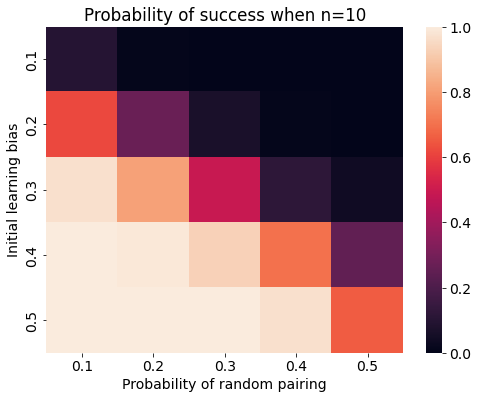

In [145]:
params = [0.1,0.2,0.3,0.4,0.5]
indexer = [0,1,2,3,4]

selectors = [data['initial_proportion_ethnic_learning'] == p for p in params]

summary = []
for j in indexer:
    filtered_data = data[selectors[j]]
    selector_2 = [filtered_data['random-pairing'] == p for p in params]

    frequency_of_success = []
    for i in indexer:
        filtered_data_2 = filtered_data[selector_2[i]]
        frequency_of_success.append(np.mean(filtered_data_2['success?']))

    summary.append(frequency_of_success)
    
summary = pd.DataFrame(summary,columns=params,index=params)
summary

import seaborn as sns

sns.heatmap(summary)
plt.title("Probability of success when n=10")
plt.ylabel("Initial learning bias")
plt.xlabel("Probability of random pairing")
plt.show()

# Version 2

The above data files were extracted from a variety of smaller, less complete version of the model while I was still exploring. There is nothing wrong with them. But in the interest of having a transparent, reproducible workflow, I have reproduced the simulations from the complete model hosted on github. Some settings were adjusted to get even more precise results.

## random pairing rate sensitivity analysis

In [146]:
url = "https://raw.githubusercontent.com/daniel-saunders-phil/dowry-game/main/data/ethnicity%20bias%20learning%20-%20github%20version%20sensitivity_to_random_pairing-table.csv"

# extract the data from the csv into a DataFrame

data = pd.read_csv(url,header=6)
data

,[run number],spatial?,random-pairing,mr_learning_strategy,conditional_strategies?,initial_proportion_ethnic_learning,plays_per_learn,mr_strategy,[step],success?,collapse?
0,4,False,0.1,0,False,0.5,1,0,1115,True,False
1,1,False,0.1,0,False,0.5,1,0,1137,True,False
2,2,False,0.1,0,False,0.5,1,0,1331,True,False
3,3,False,0.1,0,False,0.5,1,0,1418,True,False
4,6,False,0.1,0,False,0.5,1,0,938,True,False
...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,False,1.0,0,False,0.5,1,0,13,False,True
4996,4997,False,1.0,0,False,0.5,1,0,16,False,True
4997,4998,False,1.0,0,False,0.5,1,0,21,False,True
4998,4999,False,1.0,0,False,0.5,1,0,18,False,True


In [147]:
# pull out the success column
# and the pairing column

success = data["success?"]
pairing = data["random-pairing"]

# for each of the random pairing parameter values simulated,
# pull out the subset of the data and find the mean
# success rate

params = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

success_by_pairing = [success[pairing == p] for p in params]
mean_success_by_pairing_param = [np.mean(l) for l in success_by_pairing]
mean_success_by_pairing_param

[0.974, 0.92, 0.71, 0.286, 0.046, 0.002, 0.0, 0.0, 0.0, 0.0]

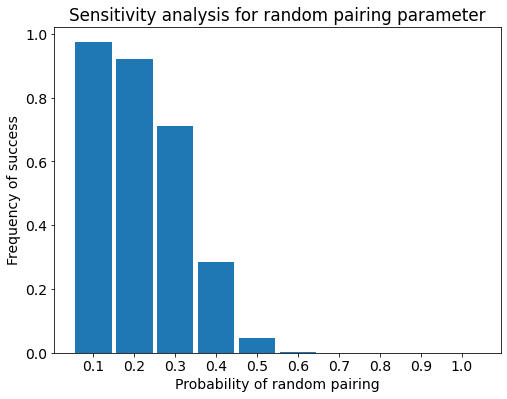

In [148]:
plt.bar(params,mean_success_by_pairing_param,width=.09)
plt.xticks(params)
plt.ylabel('Frequency of success')
plt.xlabel('Probability of random pairing')
plt.title('Sensitivity analysis for random pairing parameter')
plt.show()

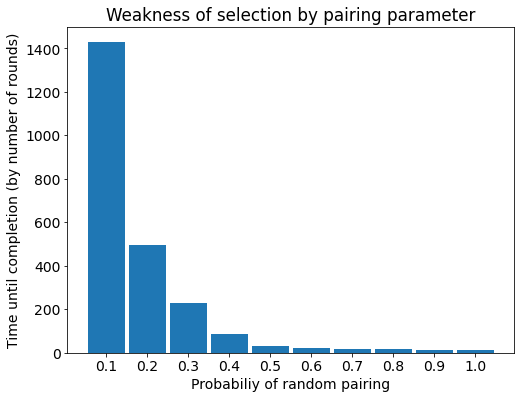

In [149]:
# repeat the above steps but for the average run time of a simulation

steps = data['[step]']

steps_by_pairing = [steps[pairing == p] for p in params]
mean_steps_by_pairing_param = [np.mean(l) for l in steps_by_pairing]

plt.bar(params,mean_steps_by_pairing_param,width=.09)
plt.xticks(params)
plt.title("Weakness of selection by pairing parameter")
plt.ylabel('Time until completion (by number of rounds)')
plt.xlabel('Probabiliy of random pairing')
plt.show()

## initial frequency sensitivity analysis

In [150]:
url = "https://raw.githubusercontent.com/daniel-saunders-phil/dowry-game/main/data/ethnicity%20bias%20learning%20-%20github%20version%20sensitivity_to_initial_bias-table.csv"

data = pd.read_csv(url,header=6)
data

,[run number],spatial?,random-pairing,mr_learning_strategy,conditional_strategies?,initial_proportion_ethnic_learning,plays_per_learn,mr_strategy,[step],success?,collapse?
0,3,False,0.2,0,False,0.1,1,0,14,False,True
1,1,False,0.2,0,False,0.1,1,0,14,False,True
2,4,False,0.2,0,False,0.1,1,0,14,False,True
3,2,False,0.2,0,False,0.1,1,0,17,False,True
4,5,False,0.2,0,False,0.1,1,0,15,False,True
...,...,...,...,...,...,...,...,...,...,...,...
2495,2497,False,0.2,0,False,0.5,1,0,239,True,False
2496,2498,False,0.2,0,False,0.5,1,0,487,True,False
2497,2491,False,0.2,0,False,0.5,1,0,1250,True,False
2498,2499,False,0.2,0,False,0.5,1,0,653,True,False


In [151]:
initial = data['initial_proportion_ethnic_learning']

params = [0.1,0.2,0.3,0.4,0.5]

summary = []
for p in params:
  selector = initial == p
  filtered_data = data[selector]
  success_by_param = np.mean(filtered_data['success?'])
  summary.append(success_by_param)

summary

[0.0, 0.016, 0.15, 0.616, 0.932]

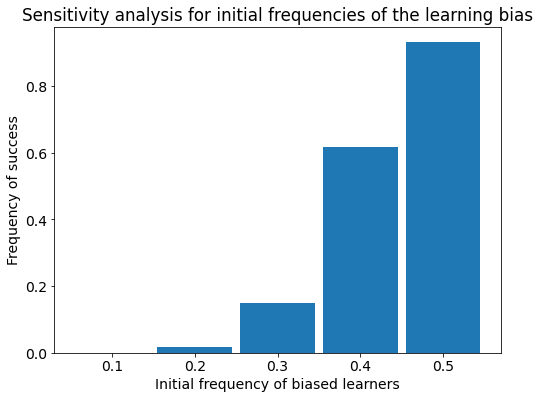

In [152]:
plt.bar(params,summary,width=.09)
plt.xticks(params)
plt.xlabel('Initial frequency of biased learners')
plt.ylabel('Frequency of success')
plt.title("Sensitivity analysis for initial frequencies of the learning bias")
plt.show()

## playing learning ratio

In [153]:
url = "https://raw.githubusercontent.com/daniel-saunders-phil/dowry-game/main/data/ethnicity%20bias%20learning%20-%20github%20version%2010_plays_per_learn-table.csv"

data = pd.read_csv(url,header=6)
data

,[run number],spatial?,random-pairing,mr_learning_strategy,conditional_strategies?,initial_proportion_ethnic_learning,plays_per_learn,mr_strategy,[step],success?,collapse?
0,4,False,0.1,0,False,0.1,10,0,18,False,True
1,3,False,0.1,0,False,0.1,10,0,20,False,True
2,6,False,0.1,0,False,0.1,10,0,21,False,True
3,5,False,0.1,0,False,0.1,10,0,27,False,True
4,2,False,0.1,0,False,0.1,10,0,48,False,True
...,...,...,...,...,...,...,...,...,...,...,...
2495,2499,False,0.5,0,False,0.5,10,0,78,False,True
2496,2497,False,0.5,0,False,0.5,10,0,185,True,False
2497,2496,False,0.5,0,False,0.5,10,0,213,True,False
2498,2498,False,0.5,0,False,0.5,10,0,288,True,False


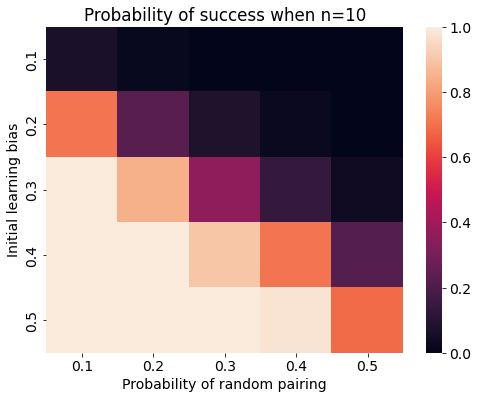

In [154]:
params = [0.1,0.2,0.3,0.4,0.5]
indexer = [0,1,2,3,4]

selectors = [data['initial_proportion_ethnic_learning'] == p for p in params]

summary = []
for j in indexer:
    filtered_data = data[selectors[j]]
    selector_2 = [filtered_data['random-pairing'] == p for p in params]

    frequency_of_success = []
    for i in indexer:
        filtered_data_2 = filtered_data[selector_2[i]]
        frequency_of_success.append(np.mean(filtered_data_2['success?']))

    summary.append(frequency_of_success)
    
summary = pd.DataFrame(summary,columns=params,index=params)
summary

sns.heatmap(summary)
plt.title("Probability of success when n=10")
plt.ylabel("Initial learning bias")
plt.xlabel("Probability of random pairing")
plt.show()